In [1]:

figsize(12,8)
import tables
from collections import Counter
matplotlib.rc("image",cmap="gray")
matplotlib.rc("image",interpolation="nearest")
from scipy.ndimage import filters,morphology
from scipy.ndimage.filters import gaussian_filter as G
def crop_black(image):
    gray = image
    if gray.ndim==3: gray = sum(image,axis=2)
    yr = find(sum(gray,axis=1)>0)
    y0 = yr[0]
    y1 = yr[-1]
    xr = find(sum(gray,axis=0)>0)
    x0 = xr[0]
    x1 = xr[-1]
    if image.ndim==3: return image[y0:y1,x0:x1,:]
    else: return image[y0:y1,x0:x1]

In [2]:
hdf = tables.openFile("1k.h5")
images = hdf.root.icons
image = mean(crop_black(images[77]),2)
imshow(image)

IOError: ``1k.h5`` does not exist

# Harris Corners

In [ ]:
def harris(image,sigma=1.0,area=5.0):
    dx = filters.gaussian_filter(image,sigma,(0,1))
    dy = filters.gaussian_filter(image,sigma,(1,0))
    sxx = filters.gaussian_filter(dx**2,area)
    sxy = filters.gaussian_filter(dx*dy,area)
    syy = filters.gaussian_filter(dy**2,area)
    T = sxx+syy
    D = sxx*syy-sxy**2
    R = (T**2-4*D)**.5
    hi = (T+R)/2
    lo = (T-R)/2
    return lo

In [ ]:
subplot(121); imshow(image)
subplot(122); imshow(harris(image,2.0,6.0)**2)

# Corners from Median

In [ ]:
smooth = filters.gaussian_filter(image,3.0)
subplot(121); imshow(smooth)
subplot(122); imshow(abs(smooth-filters.median_filter(smooth,10))**2)

# Corners from Level Curves

In [3]:
I = filters.gaussian_filter(image,3.0)
s = 2.0
Ix = filters.gaussian_filter(image,s,(0,1))
Iy = filters.gaussian_filter(image,s,(1,0))
Ixx = filters.gaussian_filter(image,s,(0,2))
Ixy = filters.gaussian_filter(image,s,(1,1))
Iyy = filters.gaussian_filter(image,s,(2,0))
k = Ix**2*Iyy + Iy**2*Ixx - 2*Ix*Iy*Ixy
subplot(121); imshow(smooth)
subplot(122); imshow(abs(k))

NameError: name 'image' is not defined

# Orientation Histograms

In [4]:
I = filters.gaussian_filter(image,1.0)
s = 1.0
Ix = filters.gaussian_filter(image,s,(0,1))
Iy = filters.gaussian_filter(image,s,(1,0))

NameError: name 'image' is not defined

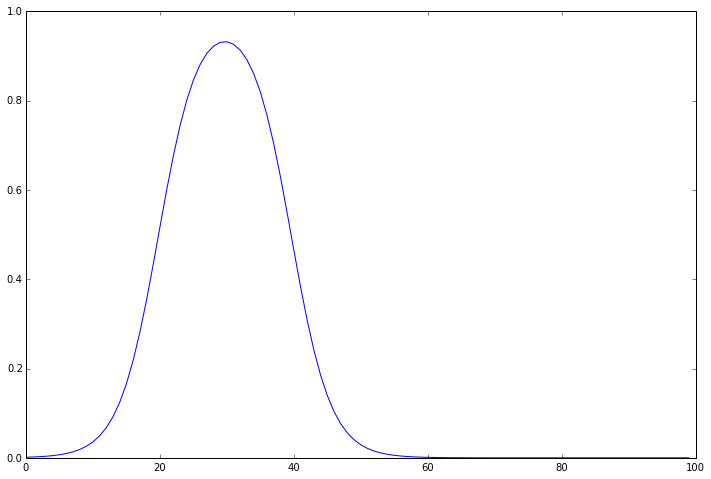

In [5]:
def between(x,a,b,r=0.03):
    return 1.0/(1+exp((a-x)/r))/(1+exp((x-b)/r))
plot(between(linspace(0.0,1.0,100),0.2,0.4))

In [6]:
bins = []
for i,a in enumerate(linspace(0,pi,8)[:-1]):
    p = abs(cos(a)*Ix+sin(a)*Iy)
    p = between(p,0.6,1.0,0.05)
    f = filters.maximum_filter(p,10)
    f /= amax(f)
    bins.append(f)
subplot(131); imshow(bins[0])
subplot(132); imshow(bins[2])
subplot(133); imshow(minimum(bins[0],bins[3]))

NameError: name 'Ix' is not defined

In [7]:
ohist = transpose(bins,[1,2,0])
plot(ohist[5,80])

ValueError: axes don't match array

# Morphological Corner Detection

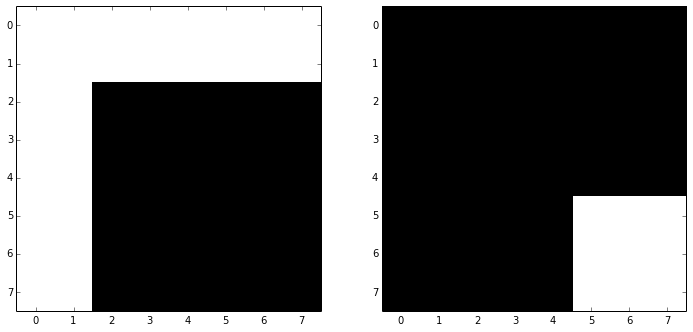

In [8]:
outside = zeros((8,8),'B')
inside = zeros((8,8),'B')
outside[:2,:] = 1; outside[:,:2] = 1
inside[-3:,-3:] = 1
subplot(121); imshow(outside)
subplot(122); imshow(inside)

In [9]:
smooth = filters.median_filter(image,5)
imshow(smooth)

NameError: name 'image' is not defined

In [ ]:
oimage = morphology.grey_opening(smooth,footprint=outside)
iimage = morphology.grey_closing(smooth,footprint=inside)
subplot(121); imshow(oimage)
subplot(122); imshow(iimage)

In [ ]:
imshow(maximum(0,oimage-image)**2)